In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

t_stim_and_led_tuple = [(row['intended_fix'], row['LED_onset_time']) for _, row in df.iterrows()]

ABL_arr = df['ABL'].unique()
ABL_arr.sort()

ILD_arr = df['ILD'].unique()
ILD_arr.sort()



In [4]:
rt_wrt_led = []
for _, row in df.iterrows():
    if row['LED_trial'] == 1:
        rt_wrt_led.append(row['timed_fix'] - row['LED_onset_time'])

In [5]:
rt_wrt_led_aborts = []
for _, row in df.iterrows():
    if row['LED_trial'] == 1 and row['timed_fix'] < row['intended_fix']:
        rt_wrt_led_aborts.append(row['timed_fix'] - row['LED_onset_time'])

Text(0, 0.5, 'density')

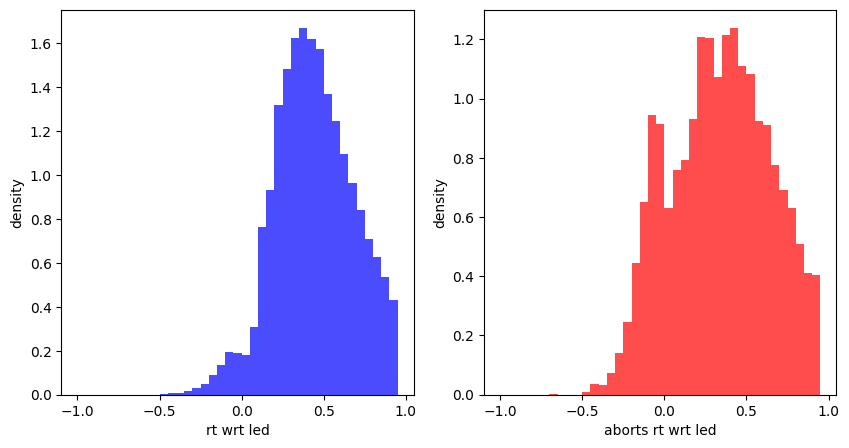

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(rt_wrt_led, bins=np.arange(-1, 1, 0.05), color='blue', alpha=0.7, label='RT wrt LED', density=True)
plt.xlabel('rt wrt led'); plt.ylabel('density')

plt.subplot(1, 2, 2)
plt.hist(rt_wrt_led_aborts, bins=np.arange(-1, 1, 0.05), color='red', alpha=0.7, label='RT wrt LED', density=True)
plt.xlabel('aborts rt wrt led'); plt.ylabel('density')

(0.0, 1.0)

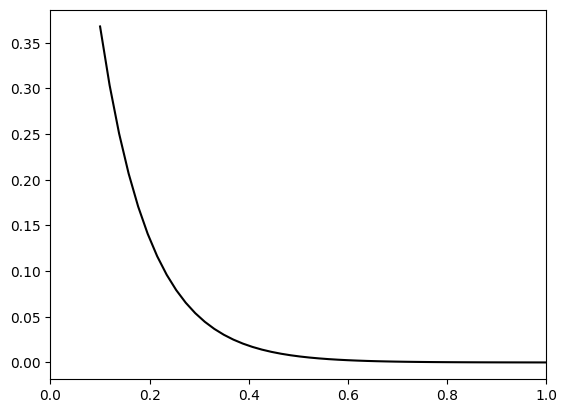

In [ ]:
tau = 0.1
t_pts = np.linspace(0.1, 2, 100)
v_0 = 1
v_t = v_0 * np.exp(-t_pts/tau) # new_v(- t/tau)

plt.plot(t_pts, v_t, color='black', label='v(t) = v_0 * exp(-t/tau)')
plt.xlim(0, 1)